## Experiment-2

In the experiment 2  here it is comparing tfidf vs countVectizer

In [1]:
import pandas as pd
import numpy as np
import os
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
dataset=pd.read_csv('Research_Article_train.csv')
#dataset.head(15)

dataset.head(5)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,1 .what Reconstructing Subject-Specific Effect...,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [3]:
dataset.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [5]:
dataset['ID']=dataset['ID'].astype(float)
dataset['Computer Science']=dataset['Computer Science'].astype(float)
dataset['Physics']=dataset['Physics'].astype(float)
dataset['Mathematics']=dataset['Mathematics'].astype(float)
dataset['Statistics']=dataset['Statistics'].astype(float)
dataset['Quantitative Biology']=dataset['Quantitative Biology'].astype(float)
dataset['Quantitative Finance']=dataset['Quantitative Finance'].astype(float)
dataset.dtypes

ID                      float64
TITLE                    object
ABSTRACT                 object
Computer Science        float64
Physics                 float64
Mathematics             float64
Statistics              float64
Quantitative Biology    float64
Quantitative Finance    float64
dtype: object

In [6]:
y=dataset[['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance']]

In [7]:
#combining 2 text columns title and abstract into one and drop columns title and abstract
dataset['Text']=dataset['TITLE']+' '+dataset['ABSTRACT']
dataset.drop(columns=['TITLE','ABSTRACT'], inplace=True)
#dataset.head(5)

### Data Preprocessing

In [8]:
remove_punc = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', remove_punc))

In [9]:
stopword = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stopword])

In [10]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [12]:
def preprocessing(dataset):
    #convert to string type
    dataset['Text'] = dataset['Text'].astype(str)
    #convert to the lowercase
    dataset["Text"] = dataset["Text"].str.lower()
    #remove punctuations
    dataset["Text"] = dataset["Text"].apply(lambda text: remove_punctuation(text))
    #stopwords removal
    dataset["Text"] = dataset["Text"].apply(lambda text: remove_stopwords(text))
    #Remove Numbers
    dataset['Text'] =dataset["Text"].str.replace('\d+', '')
    #stemming
    dataset["Text"] = dataset["Text"].apply(lambda text: stem_words(text))
    #lemmatisation
    dataset["Text"] = dataset["Text"].apply(lambda text: lemmatize_words(text))
    return dataset

In [13]:
import warnings
warnings.filterwarnings('ignore')
processed_data=preprocessing(dataset)

In [15]:
clean_data=processed_data[['Text','Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']]
clean_data.head(5)

,Text,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,reconstruct subjectspecif effect map predict m...,1.0,0.0,0.0,0.0,0.0,0.0
1,rotat invari neural network rotat invari trans...,1.0,0.0,0.0,0.0,0.0,0.0
2,spheric polyharmon poisson kernel polyharmon f...,0.0,0.0,1.0,0.0,0.0,0.0
3,finit element approxim stochast maxwelllandaul...,0.0,0.0,1.0,0.0,0.0,0.0
4,compar studi discret wavelet transform wavelet...,1.0,0.0,0.0,1.0,0.0,0.0


### Text featurisation with CountVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vector=vectorizer.fit(clean_data['Text'])

#print(vector.vocabulary_)

In [17]:
X=vector.transform(clean_data['Text'])

#### Splitting Dataset

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

#### Build the Model

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfclassifier=RandomForestClassifier(n_estimators=200)

In [21]:
rfclassifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [22]:
prediction=rfclassifier.predict(X_test)
prediction

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [24]:
from sklearn.metrics import accuracy_score
# View accuracy score
accuracy_score(y_test, prediction)


0.5687723480333731

### Text Featurisation with TF-IDF

In [25]:
tfidf=TfidfVectorizer(analyzer='word',max_features=10000,min_df=5, max_df=0.9, token_pattern = '(\S+)', ngram_range=(1, 2))
X=tfidf.fit_transform(clean_data['Text'])
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [27]:
classifier=RandomForestClassifier(n_estimators=200)

In [28]:
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [29]:
prediction=classifier.predict(X_test)


In [31]:
# View accuracy score
accuracy_score(y_test, prediction)


0.5899880810488677

The accurary of building the model with tfidf is better than the model with CountVectorizer. Acuracy is increased by 0.02%

In [32]:
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test,prediction))

[[[2087  364]
  [ 299 1445]]

 [[2963   36]
  [ 350  846]]

 [[3049   71]
  [ 363  712]]

 [[3058  111]
  [ 553  473]]

 [[4079    0]
  [ 116    0]]

 [[4145    0]
  [  50    0]]]


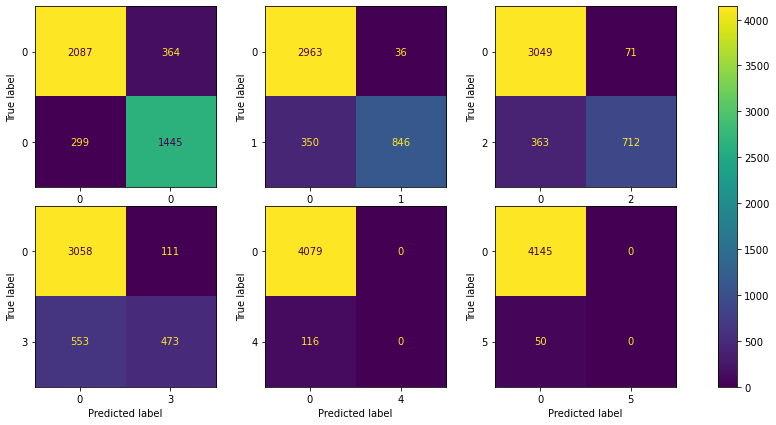

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ytest=y_test.values 
f, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.ravel()
for i in range(6):
    disp = ConfusionMatrixDisplay(confusion_matrix(ytest[:, i],prediction[:, i]),display_labels=[0, i])
                                  
    disp.plot(ax=axes[i], values_format='.4g')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1744
           1       0.96      0.71      0.81      1196
           2       0.91      0.66      0.77      1075
           3       0.81      0.46      0.59      1026
           4       0.00      0.00      0.00       116
           5       0.00      0.00      0.00        50

   micro avg       0.86      0.67      0.75      5207
   macro avg       0.58      0.44      0.50      5207
weighted avg       0.84      0.67      0.73      5207
 samples avg       0.74      0.71      0.71      5207

